In [18]:
from PIL import Image
import scipy.ndimage
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
import scipy.sparse.linalg as splinalg
import glob
import scipy.io
import os
from scipy.spatial import distance
%matplotlib inline

## Reading the training set

In [19]:
#this function will ead the training data which is 200 image. Each one is 481*321
#then reshape the image pixels cevtor to contains 3 columns which are RGB
def read_training_data():
    data_set = []
    for filename in glob.glob('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/images/train/*.jpg'):
        image=Image.open(filename)
        image_pixels_vector = np.asarray(image).reshape(-1)
        data_set.append(image_pixels_vector)
    
    data_set = np.array(data_set)
    data_set = data_set.reshape((154401 * len(data_set), 3))
    data_set = np.unique(data_set, axis=0)
    
    return data_set

## Segmentation using K-means

In [20]:
#K-means algorithm
#create a list of centroid
#the first k elements in the data set will be the first k centroids for each cluster
#while the difference between the old centroids and the new one > 0.001 keep the iterations
#create k empty clusters
#calucluate the distance between each element in the data set and the k centroids
#assign the element to a cluster where the distance between the element and the cluster centroids is the minimum one
#the new cluster centroid is its mean
#calculate the distance between the old centroids and the new one
def k_means(k, data_set):
    
    centroids_difference = 10000 
    
    new_centroids = []
  
    for i in range(k):
        new_centroids.append(data_set[i])

    while(centroids_difference > 0.001):
        
        #
        clusters = [[] for i in range(k)]
        
        new_centroids_array = np.array(new_centroids)
        distances_from_centroids = distance.cdist(data_set, new_centroids_array)
        distances_from_centroids = distances_from_centroids.tolist()
        
        for i in range(len(data_set)):    
            min_distance = min(distances_from_centroids[i])
            cluster_index = distances_from_centroids[i].index(min_distance)
            clusters[cluster_index].append(data_set[i])
            
            
        old_centroids = new_centroids[:]
        for i in range(k):
            new_centroids[i] = np.mean(clusters[i] , axis=0)
          
        
        centroids_difference = 0
        for i in range(k):
            if(len(new_centroids[i]) == 0):
                new_centroids[i] = [0] * len(data_set[0])
            centroids_difference += np.abs(np.linalg.norm(old_centroids[i]) - np.linalg.norm(new_centroids[i]))
        
       
    return clusters, new_centroids

In [21]:
#for each element in cluster[i], map it with the representative color
#that will simple the search for the cluster representative color when testing
def create_pixel_color_map(clusters, cluster_representative_color):
    pixel_color_map = {}
    for i in range(len(clusters)):
        for pixel in clusters[i]:
            pixel_color_map.update({str(pixel[:3]) : cluster_representative_color[i][:3]})
            
    return pixel_color_map

In [22]:
#load one test image
#check if the pixel in the pixel color map
#if yes, then replace the pixel with the corresponding cluster representative color
#else,assign the pixel to a cluster then replace the pixel with the corresponding cluster representative color
#then display the image after clustering
def display_clustering_result(cluster_representative_color, pixel_color_map):

    filename =  glob.glob('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/images/train/239096.jpg')
    test_image=Image.open(filename[0])
        
    test_image_pixels = np.asarray(test_image).reshape((154401, 3))
    
    alternative_test_image_pixels = []
    for i in range(len(test_image_pixels)):
        if(str(test_image_pixels[i]) in pixel_color_map):
            RGB = pixel_color_map.get(str(test_image_pixels[i]))
            
        else:
            distances_from_centroids = []
            for j in range(len(cluster_representative_color)):
                    distances_from_centroids.append(np.linalg.norm(cluster_representative_color[j] - test_image_pixels[i]))
            cluster_index = distances_from_centroids.index(min(distances_from_centroids))
            RGB = cluster_color[cluster_index]
            
            
        alternative_test_image_pixels.append(RGB[0] * 256**2 + RGB[1]*256 + RGB[2])
        
    alternative_test_image = (np.array(alternative_test_image_pixels)).reshape((321, 481))
    plt.imshow(alternative_test_image)

In [23]:
#
def apply_k_means(k, data_set):
    clusters, cluster_representative_color = k_means(k, data_set)
    print('THE CLUSTERING EVALUATION & RESULTING IMAGE FROM TESTING CLUSTERING WITH K = %d' % k)
    pixel_color_map = create_pixel_color_map(clusters, cluster_representative_color)
    display_clustering_result(cluster_representative_color, pixel_color_map)
    clustering_evaluation(cluster_representative_color)

In [24]:
data_set = read_training_data()

THE CLUSTERING EVALUATION & RESULTING IMAGE FROM TESTING CLUSTERING WITH K = 3
FOR TEST IMAGE 0 :
CONDITIONAL ENTROPY MEASURE = 2.794801
F MEASURE = 0.284352
FOR TEST IMAGE 1 :
CONDITIONAL ENTROPY MEASURE = 1.097002
F MEASURE = 0.517602
FOR TEST IMAGE 2 :
CONDITIONAL ENTROPY MEASURE = 1.588241
F MEASURE = 0.410796
FOR TEST IMAGE 3 :
CONDITIONAL ENTROPY MEASURE = 1.091472
F MEASURE = 0.299796
FOR TEST IMAGE 4 :
CONDITIONAL ENTROPY MEASURE = 1.373752
F MEASURE = 0.537314


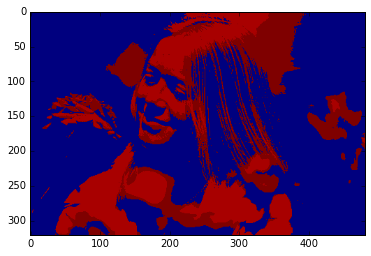

In [186]:
apply_k_means(3, data_set)

THE RESULTING IMAGE FROM TESTING CLUSTERING WITH K = 5
FOR TEST IMAGE 0 :
CONDITIONAL ENTROPY MEASURE = 2.557904
F MEASURE = 0.310562
FOR TEST IMAGE 1 :
CONDITIONAL ENTROPY MEASURE = 0.887710
F MEASURE = 0.431266
FOR TEST IMAGE 2 :
CONDITIONAL ENTROPY MEASURE = 1.510922
F MEASURE = 0.303921
FOR TEST IMAGE 3 :
CONDITIONAL ENTROPY MEASURE = 1.032406
F MEASURE = 0.247609
FOR TEST IMAGE 4 :
CONDITIONAL ENTROPY MEASURE = 1.089694
F MEASURE = 0.471345


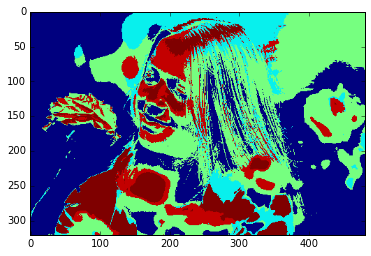

In [176]:
apply_k_means(5, data_set)

THE CLUSTERING EVALUATION & RESULTING IMAGE FROM TESTING CLUSTERING WITH K = 7
FOR TEST IMAGE 0 :
CONDITIONAL ENTROPY MEASURE = 2.500717
F MEASURE = 0.301662
FOR TEST IMAGE 1 :
CONDITIONAL ENTROPY MEASURE = 0.844234
F MEASURE = 0.367284
FOR TEST IMAGE 2 :
CONDITIONAL ENTROPY MEASURE = 1.441415
F MEASURE = 0.312344
FOR TEST IMAGE 3 :
CONDITIONAL ENTROPY MEASURE = 0.968703
F MEASURE = 0.252924
FOR TEST IMAGE 4 :
CONDITIONAL ENTROPY MEASURE = 1.075603
F MEASURE = 0.336683


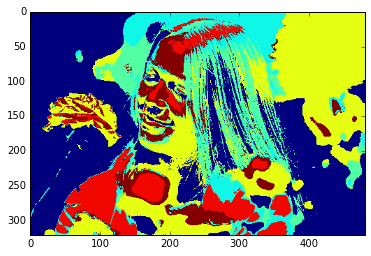

In [266]:
apply_k_means(7, data_set)

THE CLUSTERING EVALUATION & RESULTING IMAGE FROM TESTING CLUSTERING WITH K = 9
FOR TEST IMAGE 0 :
CONDITIONAL ENTROPY MEASURE = 2.394932
F MEASURE = 0.277245
FOR TEST IMAGE 1 :
CONDITIONAL ENTROPY MEASURE = 0.900463
F MEASURE = 0.289772
FOR TEST IMAGE 2 :
CONDITIONAL ENTROPY MEASURE = 1.426664
F MEASURE = 0.256567
FOR TEST IMAGE 3 :
CONDITIONAL ENTROPY MEASURE = 0.954736
F MEASURE = 0.218739
FOR TEST IMAGE 4 :
CONDITIONAL ENTROPY MEASURE = 1.087290
F MEASURE = 0.270565


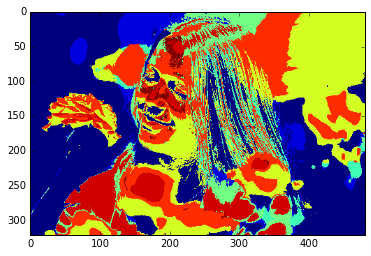

In [25]:
apply_k_means(9, data_set)

THE CLUSTERING EVALUATION & RESULTING IMAGE FROM TESTING CLUSTERING WITH K = 11
FOR TEST IMAGE 0 :
CONDITIONAL ENTROPY MEASURE = 2.346053
F MEASURE = 0.265079
FOR TEST IMAGE 1 :
CONDITIONAL ENTROPY MEASURE = 0.825591
F MEASURE = 0.286668
FOR TEST IMAGE 2 :
CONDITIONAL ENTROPY MEASURE = 1.399192
F MEASURE = 0.222251
FOR TEST IMAGE 3 :
CONDITIONAL ENTROPY MEASURE = 0.947514
F MEASURE = 0.182435
FOR TEST IMAGE 4 :
CONDITIONAL ENTROPY MEASURE = 1.092689
F MEASURE = 0.248251


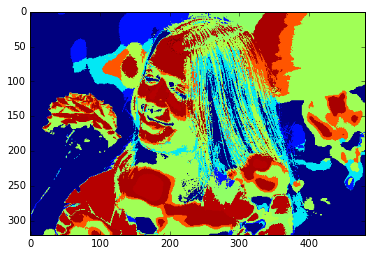

In [26]:
apply_k_means(11, data_set)

## Creating the partitioning & clustering

In [8]:
def load_test_set():
    test_set = []
    for filename in glob.glob('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/images/test set/*.jpg'):
        image=Image.open(filename)
        image_pixels_vector = np.asarray(image).reshape(-1)
        test_set.append(image_pixels_vector)
    
    return test_set

In [9]:
def reshape_image_pixels_vector(image_pixels_vector):
    
    image_pixels_vector = np.array(image_pixels_vector)
    image_pixels_vector = image_pixels_vector.reshape((154401, 3))
    
    return image_pixels_vector

In [10]:
def load_test_set_ground_truth():
    
    dataDir = "E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/groundTruth/test set/"
    test_set_mat_files = []
    for file in os.listdir(dataDir) :
        test_set_mat_files.append( scipy.io.loadmat( dataDir+file ) )

    ground_truth = []
    for i in range(len(test_set_mat_files)) :
        ground_truth.append(test_set_mat_files[i]['groundTruth'][0][2][0][0][0])
        #plt.imshow(ground_truth[i])
        #plt.show()
        
    return ground_truth

In [11]:
def get_clustering(test_data, clusters_centroids):
    
    clustering = [[] for i in range(len(clusters_centroids))]
    
    for i in range(len(test_data)):
        distances_from_centroids = []
        for j in range(len(clusters_centroids)):
            distances_from_centroids.append(np.linalg.norm(clusters_centroids[j] - test_data[i]))
        
        cluster_index = distances_from_centroids.index(min(distances_from_centroids))
        clustering[cluster_index].append(i)
                
    return clustering

In [12]:
def get_partitioning(ground_truth):
    ground_truth = ground_truth.reshape(-1)
    unique_values = list(set(ground_truth))
    
    partitioning_num = len(unique_values)
    partitioning = [[] for i in range(partitioning_num)]
    
    uniqueValue_partitioningIndex_map = {}
   
    for i in range(partitioning_num):
        uniqueValue_partitioningIndex_map.update({str(unique_values[i]) : i})
        
        
    for i in range(len(ground_truth)):
        partition_index = uniqueValue_partitioningIndex_map.get(str(ground_truth[i]))
        partitioning[partition_index].append(i)
        
    return partitioning

In [13]:
def clustering_evaluation(cluster_representative_color):  
    test_set = load_test_set()
    test_set_ground_truth = load_test_set_ground_truth()
    
    for i in range(len(test_set)):
        test_set[i] = reshape_image_pixels_vector(test_set[i])
        clustering = get_clustering(test_set[i], cluster_representative_color)
        partitioning = get_partitioning(test_set_ground_truth[i])
        contingency_table = create_contingency_table(partitioning, clustering)
        conditional_entropy = conditional_entropy_measure(partitioning, clustering, 154401, contingency_table)
        F = F_measure(partitioning, clustering, contingency_table)
        
        print('FOR TEST IMAGE %d :' % i)
        print('CONDITIONAL ENTROPY MEASURE = %f' % conditional_entropy)
        print('F MEASURE = %f' % F)    

## Contingency Table

In [14]:
def create_contingency_table(partitioning, clustering):
    contingency_table = np.zeros((len(clustering), len(partitioning)))
    
    for i in range(len(clustering)):
            for j in range(len(partitioning)):
                contingency_table[i][j] = len(set(clustering[i]).intersection(partitioning[j]))
                    
    return contingency_table

## Conditional Entropy Measure

In [15]:
def conditional_entropy_measure(partitioning, clustering, data_set_length, contingency_table):
    
    conditional_entropy = 0
    
    for i in range(len(contingency_table)):
        for j in range(len(contingency_table[0])):
            if(contingency_table[i][j] != 0):
                conditional_entropy += (contingency_table[i][j] / data_set_length) * np.log(contingency_table[i][j] / len(clustering[i]))
            
            
    conditional_entropy *= -1
    
    return conditional_entropy

## F Measure

In [16]:
def F_measure(partitioning, clustering, contingency_table):
    
    F = 0
    
    for i in range (len(clustering)):
        
        max_element = max(contingency_table[i])
        
        max_index = np.where(contingency_table[i] == max_element)
        
        if(len(clustering[i]) != 0):
            prec =  max_element / len(clustering[i])
        
        recall = max_element / len(partitioning[max_index[0][0]])
        
        F += (2 * prec * recall) / (prec + recall)
        
    F /= len(clustering)
    
    return F

## Segmentation using Normalized Cut

In [52]:
def spectral_clustring_kNN_similarity(k, data_set):
    
    KNN_similarity_matrix = KNN_similarity(5, data_set)
    
    degree_list = []
    
    for i in range(len(data_set)):
        degree_list.append(sum(KNN_similarity_matrix[i]))
        
    #print(degree_list)
    degree_matrix = np.diag(degree_list)
         
    laplacian_matrix = degree_matrix - KNN_similarity_matrix
    
    degree_matrix_inverse = np.linalg.inv(degree_matrix)
    
    normalized_asymmetric_laplacian_matrix = np.matmul(degree_matrix_inverse, laplacian_matrix)
    
    
    eigenvalues, eigenvectors = splinalg.eigsh(normalized_asymmetric_laplacian_matrix, k = k)
    
    #print(eigenvalues)
    
    U_matrix = eigenvectors[:,:k]
    
    Y_matrix = [0] * k
    for i in range(len(data_set)):
        Y_matrix = np.vstack([Y_matrix, (U_matrix[i] / np.linalg.norm(U_matrix[i]))])
    Y_matrix = Y_matrix[1: , 0:]
        
    return Y_matrix
    
    
def KNN_similarity(knn, data_set):
    tree = KDTree(data_set, leaf_size=10)
    dist, KNNindexs = tree.query(data_set, k=knn)
    KNN_similarity_matrix = np.zeros((len(data_set), len(data_set)))
    for i in range(len(KNNindexs)):
        for j in range(knn):
            KNN_similarity_matrix[i][KNNindexs[i][j]] = 1
            
            
    return KNN_similarity_matrix

In [53]:
def spectral_clustering_k_means(k, k_means_on, k_means_for):
    
    centroids_difference = 10000 
    
    new_centroids = []
    clusters_color_centroids = []
    
    for i in range(k):
        #new_centroids.append(np.random.randint(150, size=3))
        new_centroids.append(k_means_on[i])
        clusters_color_centroids.append(np.random.randint(150, size=3))
         
    while(centroids_difference > 0.001):
        clusters = [[] for i in range(k)]
        clusters_color = [[] for i in range(k)]
        
        new_centroids_array = np.array(new_centroids)
        distances_from_centroids = distance.cdist(k_means_on, new_centroids_array)
        distances_from_centroids = distances_from_centroids.tolist()
        
        for i in range(len(k_means_on)):
            min_distance = min(distances_from_centroids[i])
            cluster_index = distances_from_centroids[i].index(min_distance)
            clusters[cluster_index].append(k_means_on[i])
            clusters_color[cluster_index].append(k_means_for[i])
            
            
        old_centroids = new_centroids[:]
        for i in range(k):
            new_centroids[i] = np.mean(clusters[i] , axis=0)
            clusters_color_centroids[i] = np.mean(clusters_color[i], axis=0)
          
        
        centroids_difference = 0
        for i in range(k):
            if(len(new_centroids[i]) == 0):
                new_centroids[i] = [0] * len(k_means_on[0])
            centroids_difference += np.abs(np.linalg.norm(old_centroids[i]) - np.linalg.norm(new_centroids[i]))
        
       
    return clusters_color, clusters_color_centroids

In [36]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [64]:
compressed_data_set, data_size = read_compressed_data()
compressed_data_set = np.unique(compressed_data_set, axis=0)

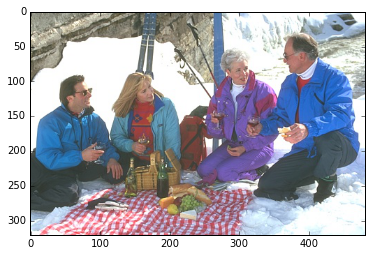

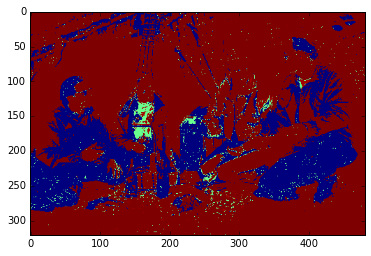

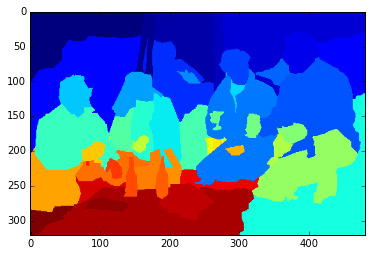

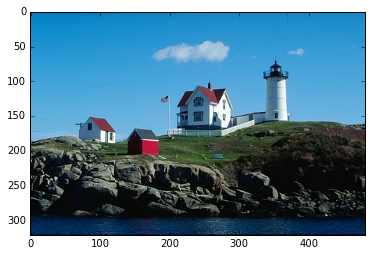

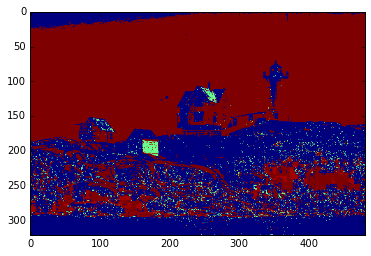

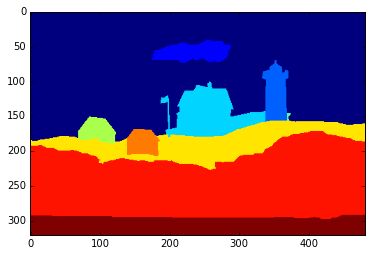

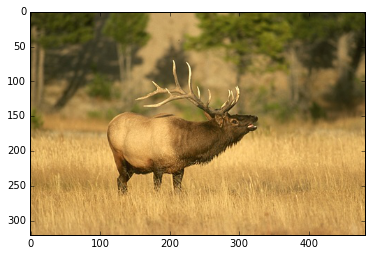

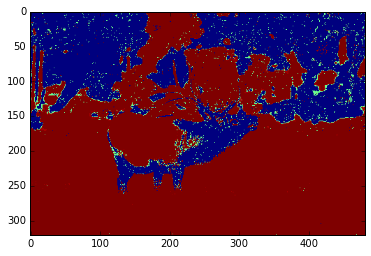

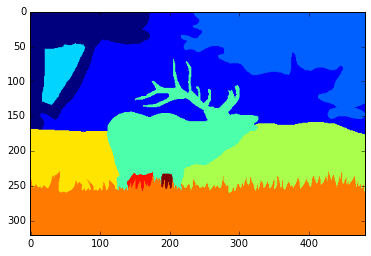

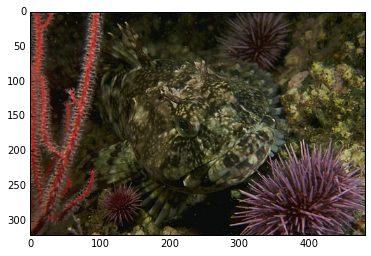

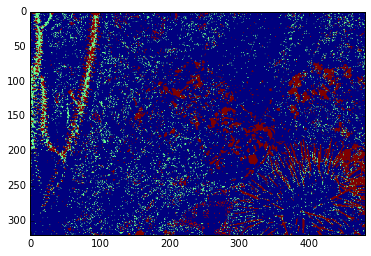

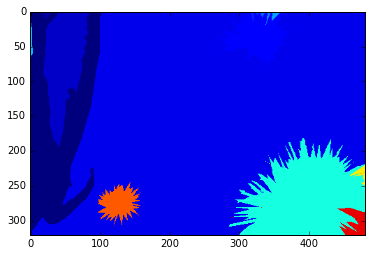

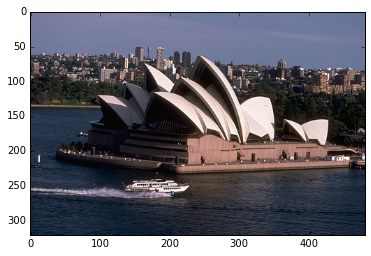

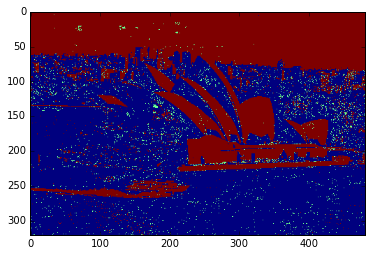

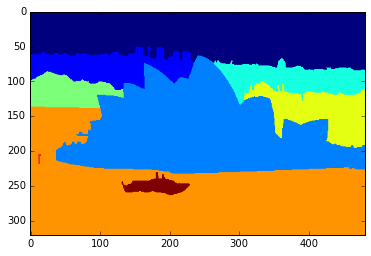

In [63]:
Y_matrix = spectral_clustring_kNN_similarity(5, compressed_data_set)
clusters, cluster_representative_color = spectral_clustering_k_means(5, Y_matrix, compressed_data_set)
pixel_color_map = create_pixel_color_map(clusters, cluster_representative_color)
clustering_aganist_groundTruth(cluster_representative_color, pixel_color_map ,False)

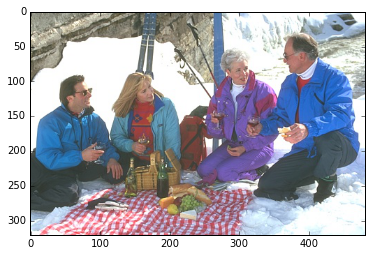

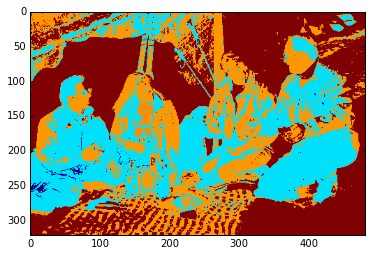

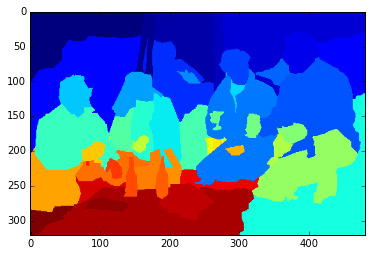

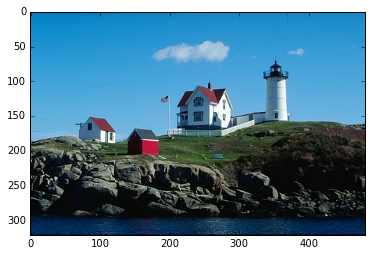

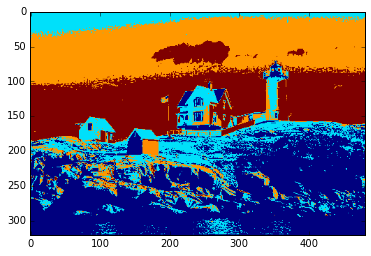

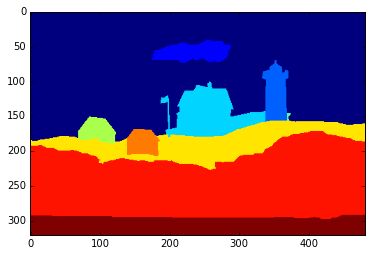

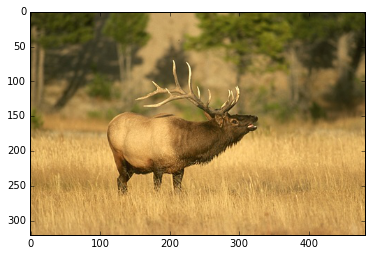

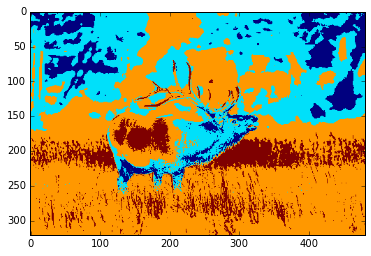

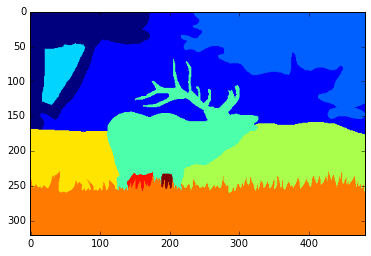

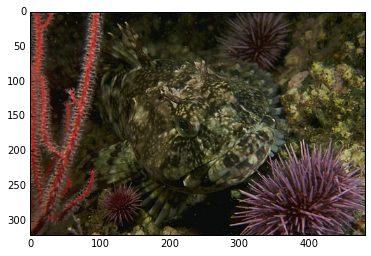

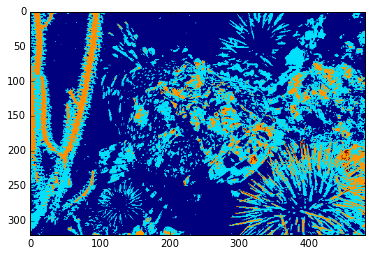

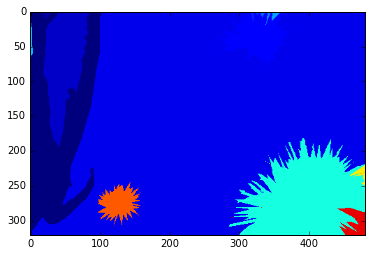

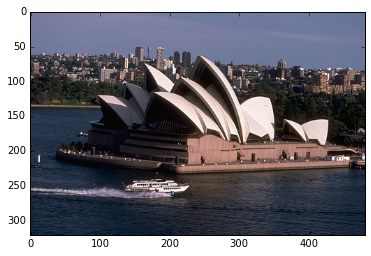

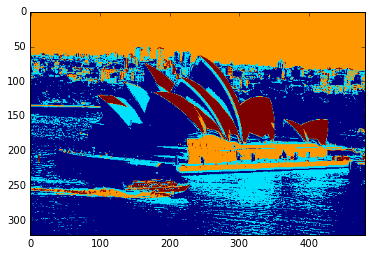

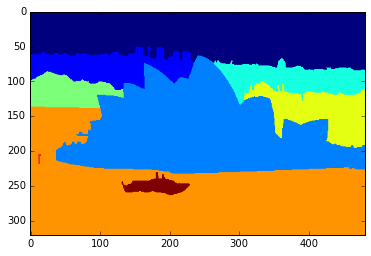

In [66]:
clusters, cluster_representative_color = k_means(5, compressed_data_set)
pixel_color_map = create_pixel_color_map(clusters, cluster_representative_color)
clustering_aganist_groundTruth(cluster_representative_color, pixel_color_map, False)

## EXTRA

In [67]:
def read_data_set_with_spatial_layout():
    
    data_set, data_size = read_compressed_data()

    data_set = add_pixels_spatial_layout(data_set, data_size)
    
    data_set = np.unique(data_set, axis=0)
    
    return data_set

In [68]:
def read_compressed_data():
    
    data_set = []
    for filename in glob.glob('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/images/compressed data/train/*.jpg'):
        image=Image.open(filename) 
        image_pixels_vector = np.asarray(image).reshape(-1)
        data_set.append(image_pixels_vector)
        
    data_set = np.array(data_set)
    
    data_size = len(data_set)
    
    data_set = data_set.reshape((9600 * data_size, 3))
    
    return data_set, data_size

In [69]:
def add_pixels_spatial_layout(data_set, data_size):
    
    pixel_spatial_layout =[]
    for i in range (data_size):
        for j in range (80):
            for k in range (120):
                pixel_spatial_layout.append([j,k])
                
    pixel_spatial_layout = np.array(pixel_spatial_layout)
    
    data_set = np.hstack([data_set, pixel_spatial_layout])
    
    return data_set

In [70]:
def clustering_aganist_groundTruth(cluster_representative_color, pixel_color_map, add_spatial_layout):
    
    ground_truth = load_test_set_ground_truth()
    n = 0
    
    for filename in glob.glob('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/images/test set/*.jpg'):
        test_image=Image.open(filename)
            
        plt.imshow(test_image) 
        plt.show()
        
        test_image_pixels = np.asarray(test_image).reshape((154401, 3))
       
        if(add_spatial_layout):
            pixel_spatial_layout =[]
            for j in range (321):
                for k in range (481):
                    pixel_spatial_layout.append([j,k]) 
                    
            pixel_spatial_layout = np.array(pixel_spatial_layout)
            test_image_pixels = np.hstack([test_image_pixels, pixel_spatial_layout])
        
        alternative_test_image_pixels = []
        for i in range(len(test_image_pixels)):
            if(str(test_image_pixels[i]) in pixel_color_map):
                RGB = pixel_color_map.get(str(test_image_pixels[i]))
                
            else:
                distances_from_centroids = []
                for j in range(len(cluster_representative_color)):
                        distances_from_centroids.append(np.linalg.norm(cluster_representative_color[j] - test_image_pixels[i]))
                cluster_index = distances_from_centroids.index(min(distances_from_centroids))
                RGB = cluster_representative_color[cluster_index]
                
                
            alternative_test_image_pixels.append(RGB[0] * 256**2 + RGB[1]*256 + RGB[2])
            
        alternative_test_image = (np.array(alternative_test_image_pixels)).reshape((321, 481))
        plt.imshow(alternative_test_image)
        plt.show()
        
        plt.imshow(ground_truth[n])
        plt.show()
        
        n += 1

GROUND TRUTH IMAGES AGANIST RESULTING IMAGES FROM TESTING CLUSTERING WITH K = 5


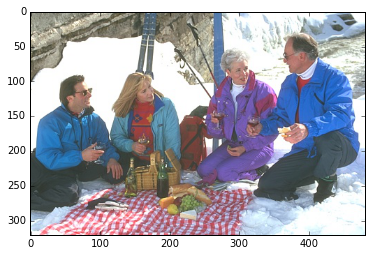

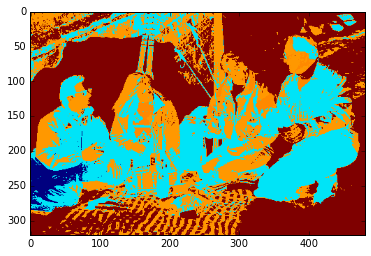

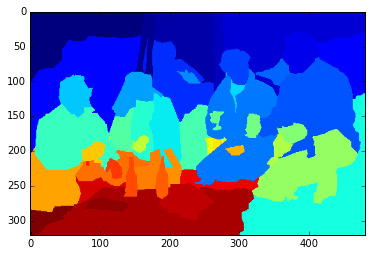

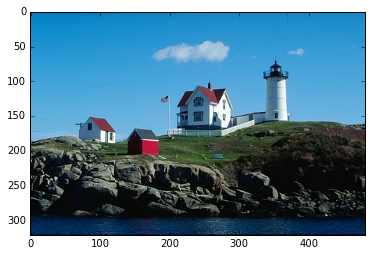

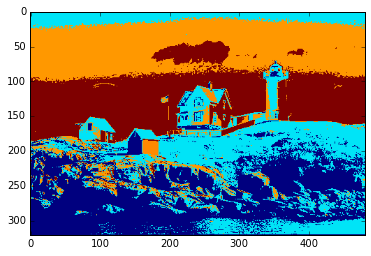

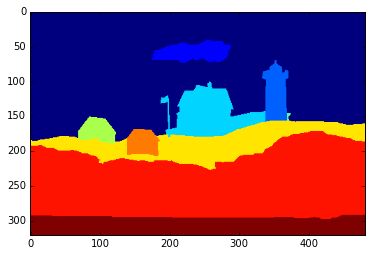

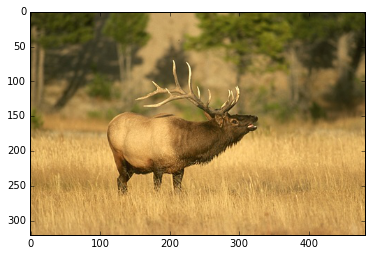

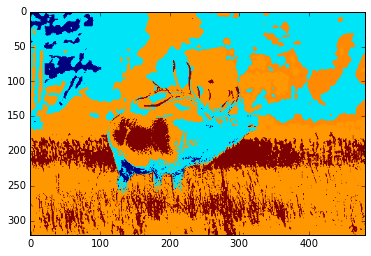

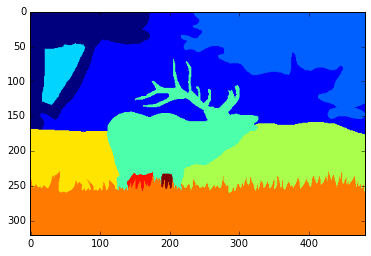

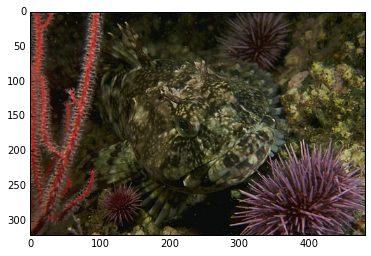

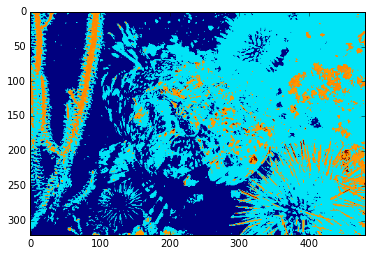

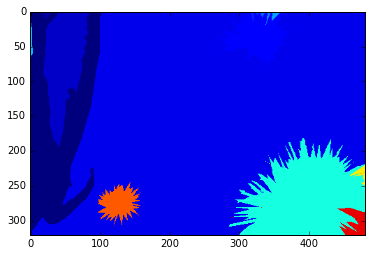

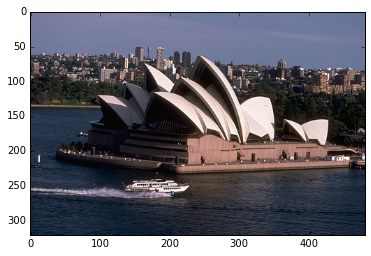

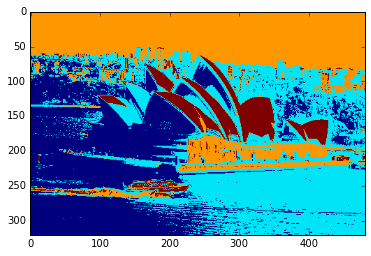

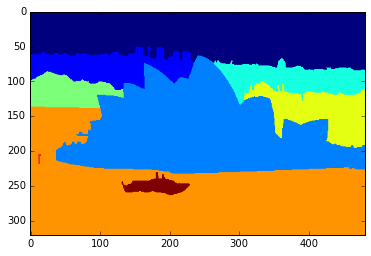

In [71]:
data_set = read_data_set_with_spatial_layout()
clusters, cluster_representative_color = k_means(5, data_set)
print('GROUND TRUTH IMAGES AGANIST RESULTING IMAGES FROM TESTING CLUSTERING WITH K = 5')
pixel_color_map = create_pixel_color_map(clusters, cluster_representative_color)
clustering_aganist_groundTruth(cluster_representative_color, pixel_color_map, True)